In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_fashion_dataset (2).csv')
df.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,42098,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,4697.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33


In [ ]:
df.shape

(36484, 17)

<h3>handling missing values</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [ ]:
df.isnull().sum()

,0
user_id,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0


In [ ]:
df.usage.value_counts()

,count
usage,
Casual,27597
Sports,3707
Ethnic,3040
Formal,2043
Smart Casual,64
Travel,26
Party,7


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,user_id,id,year,ratings,Price (USD)
count,36484.000000,36484.000000,36484.000000,36484.000000,36484.000000
mean,55673.109336,27860.189124,2012.461737,3.600839,33.828610
std,25987.221109,16562.799723,1.860980,1.279767,11.320579
min,10022.000000,1163.000000,2007.000000,1.000000,10.000000
25%,32865.000000,13247.000000,2011.000000,3.000000,25.000000
50%,55706.000000,26471.500000,2012.000000,4.000000,34.000000
75%,78386.000000,41718.250000,2012.000000,5.000000,42.000000
max,99995.000000,60000.000000,2018.000000,5.000000,66.000000


In [ ]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [ ]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [ ]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [ ]:
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,id,36484
1,year,12
2,ratings,5
3,Price (USD),57


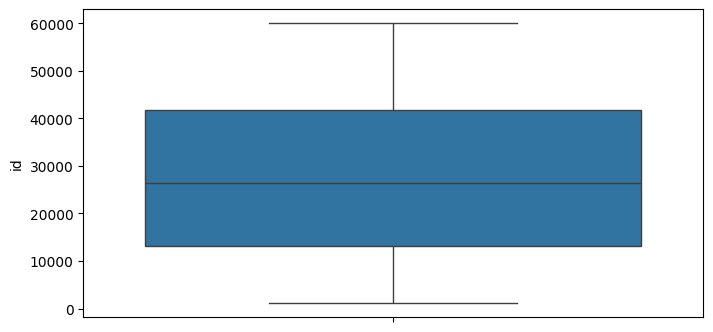

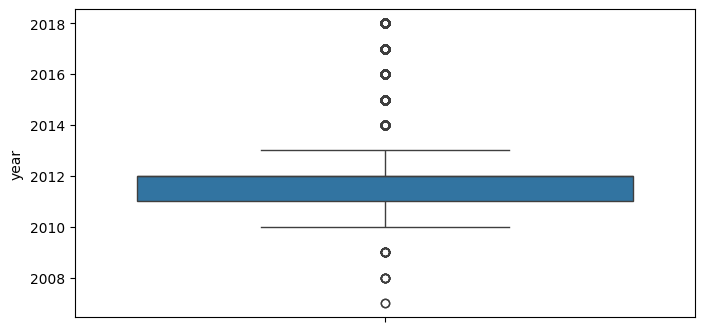

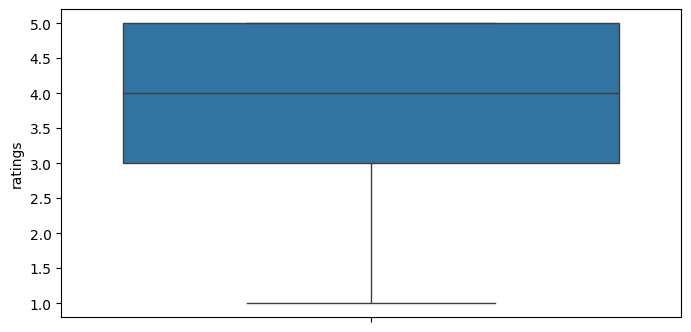

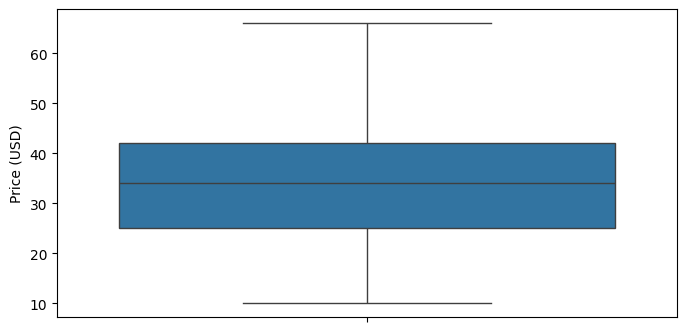

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

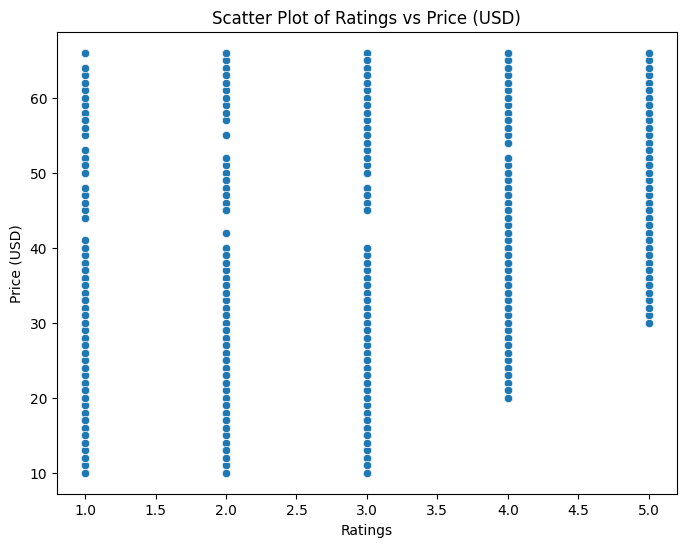

In [ ]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [ ]:
q25,q75 = np.percentile(df["year"],[25,75])

In [ ]:
iqr = q75 - q25
iqr

1.0

In [ ]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(2009.5, 2013.4)

In [ ]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [ ]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
6,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41
36476,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53
36477,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43
36479,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48


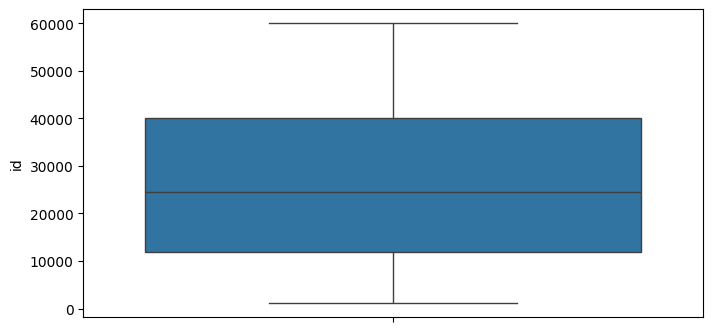

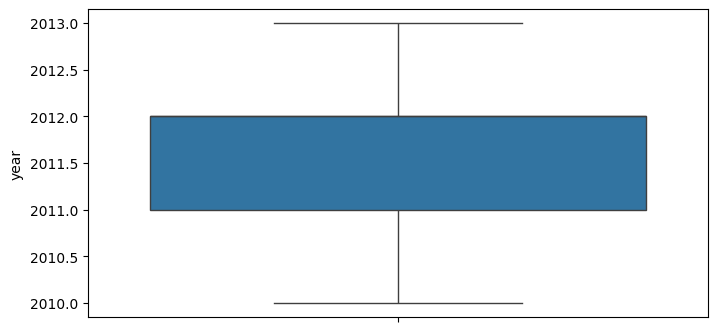

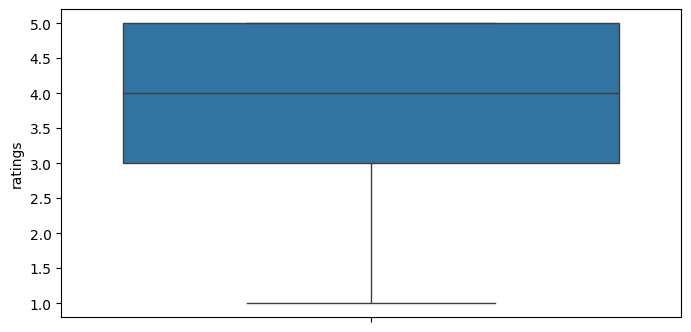

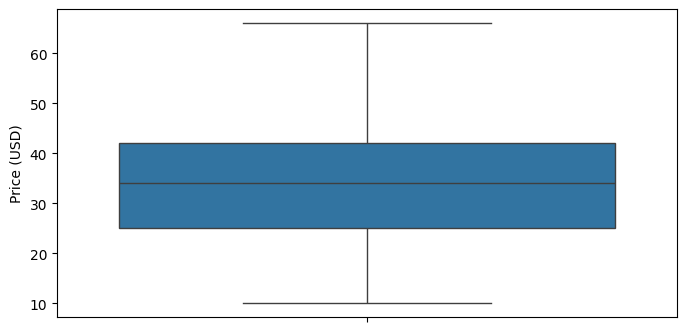

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

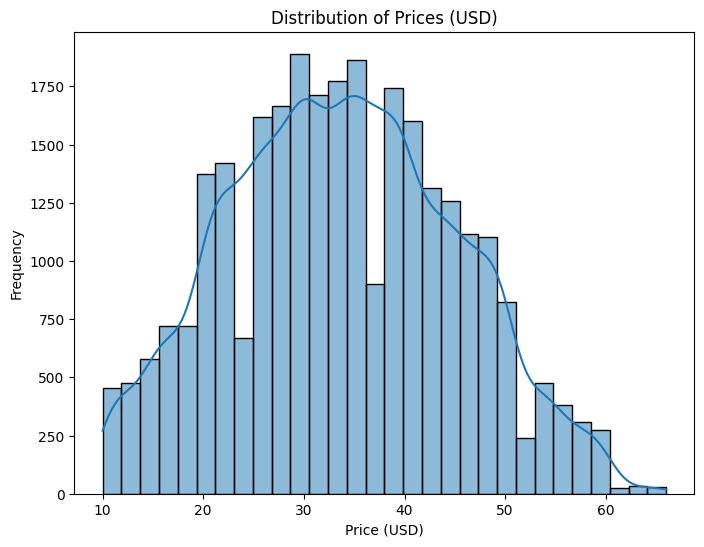

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


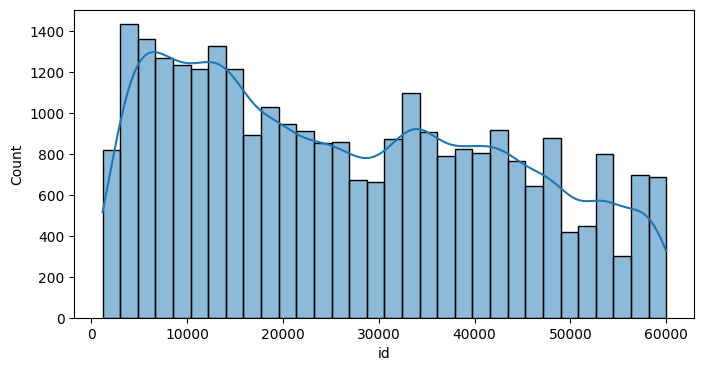

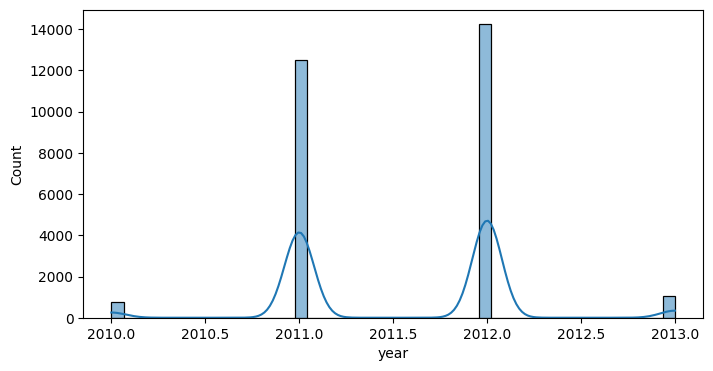

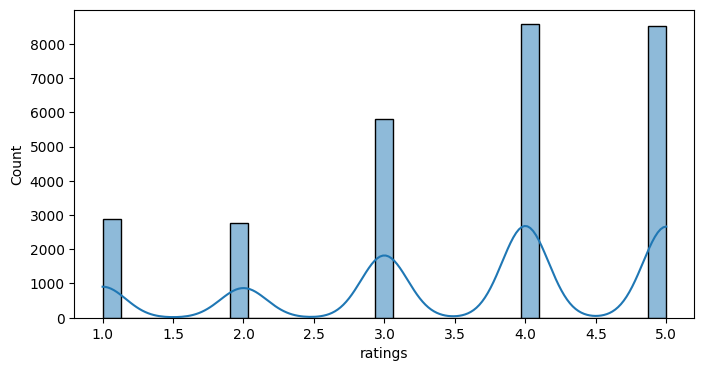

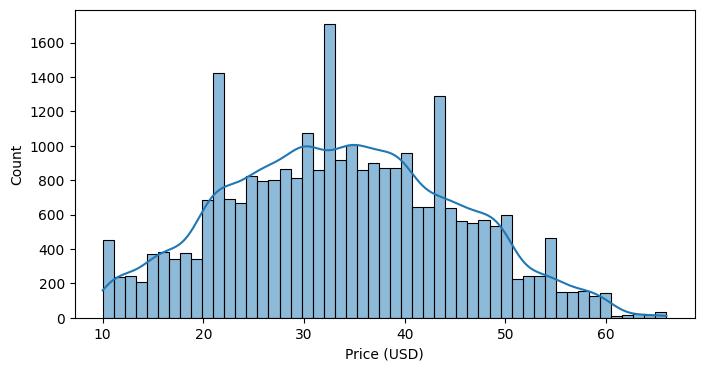

In [ ]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


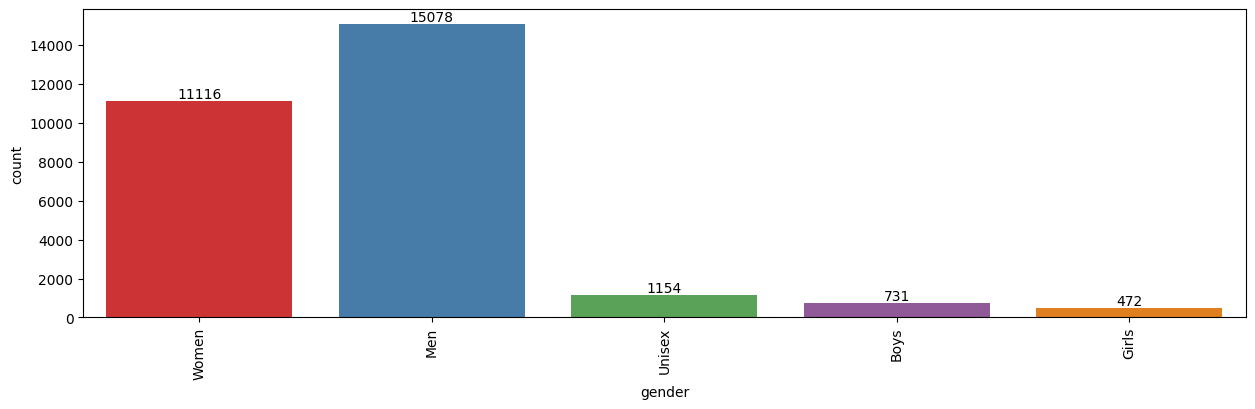

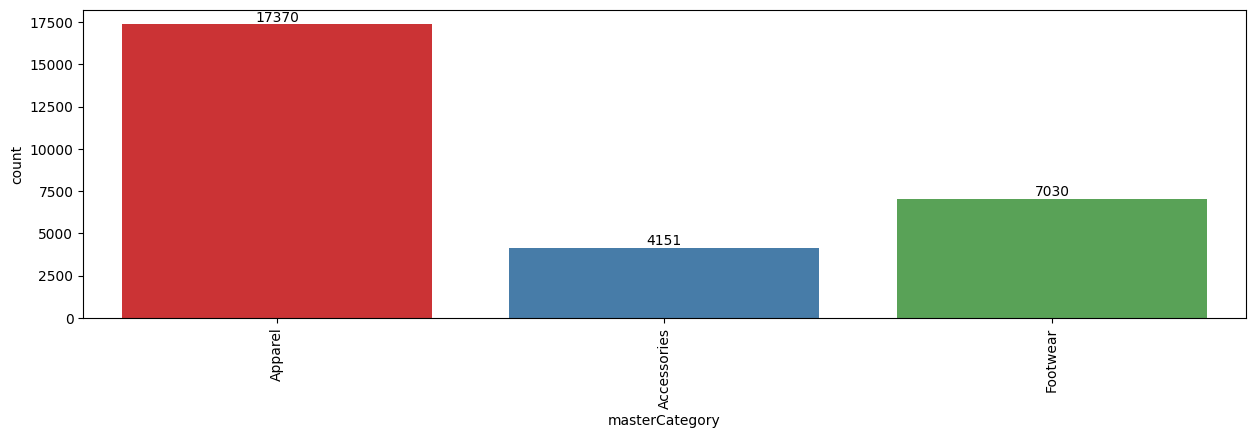

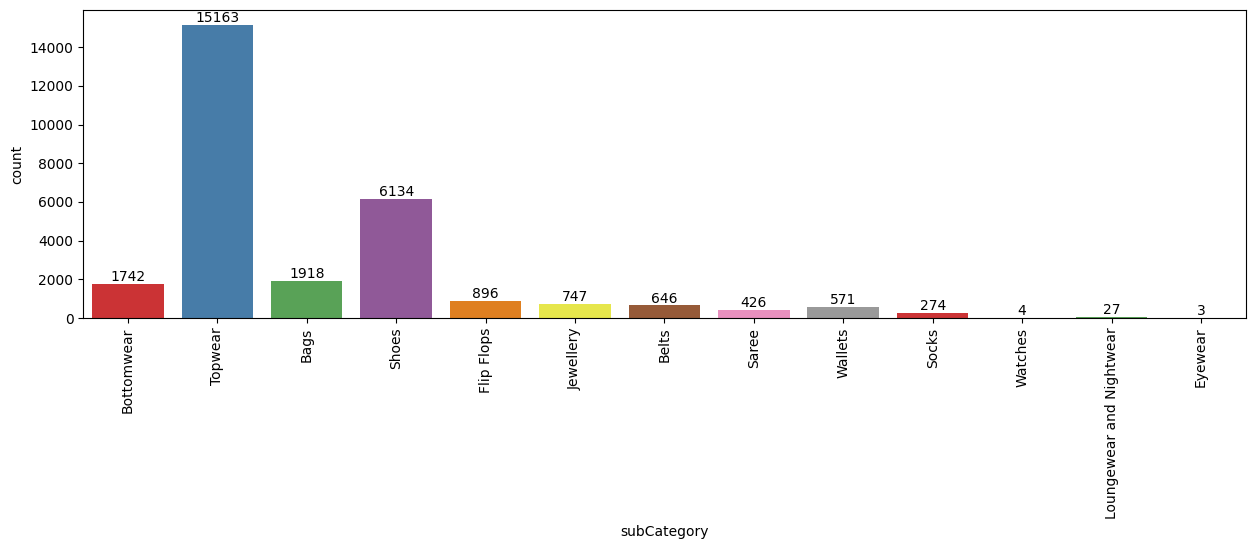

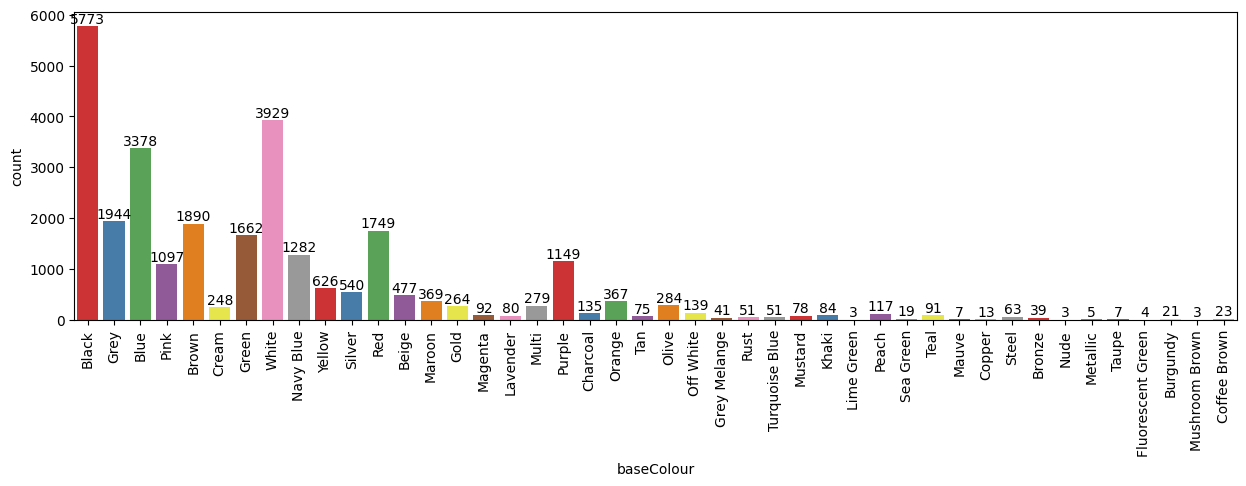

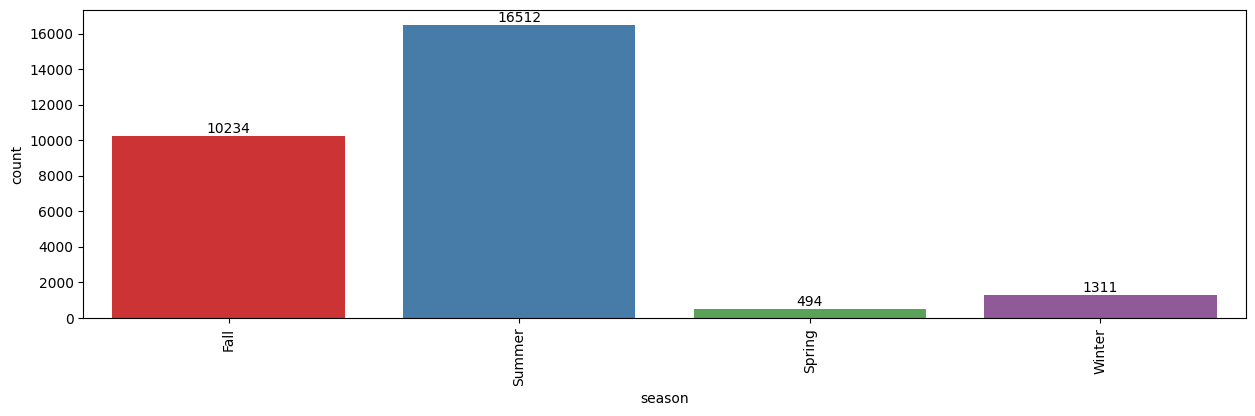

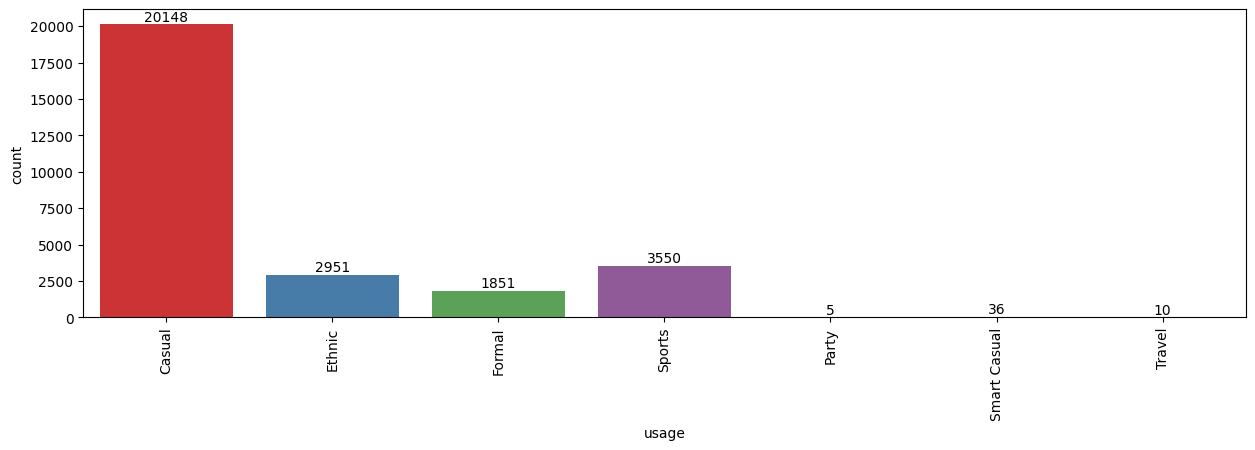

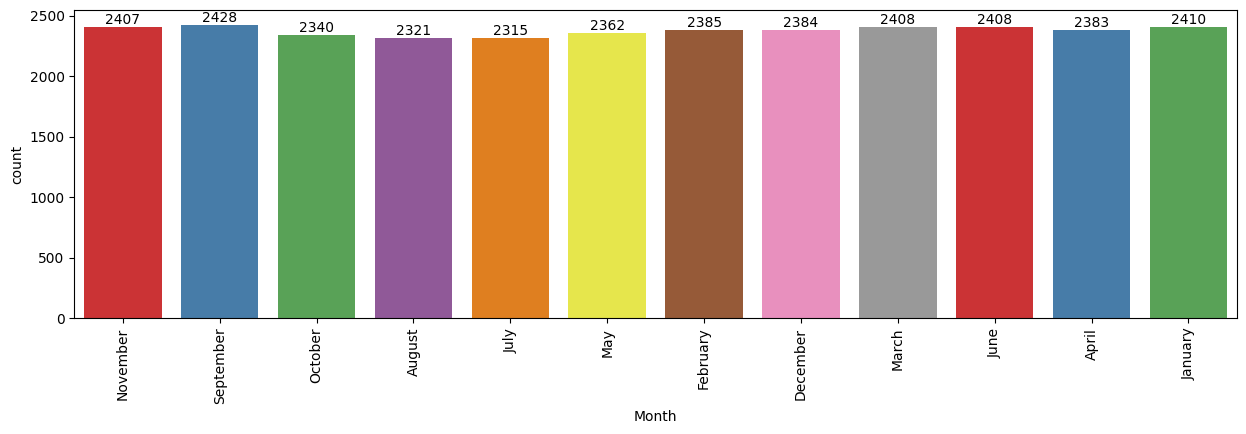

In [ ]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

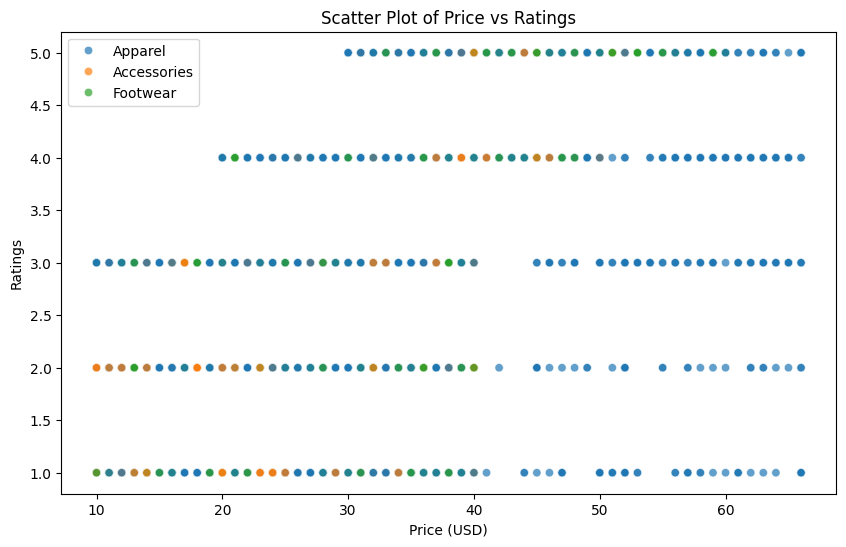

In [ ]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

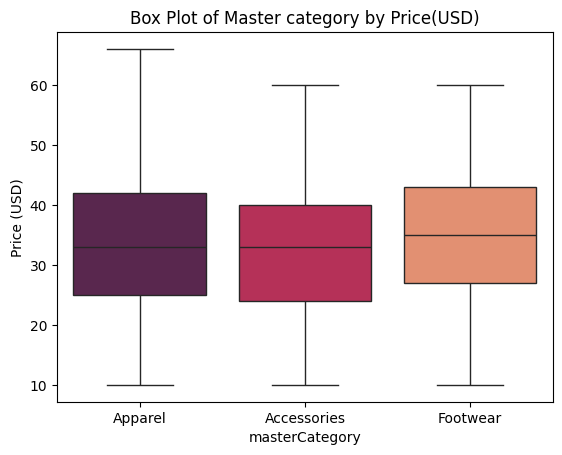

In [ ]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

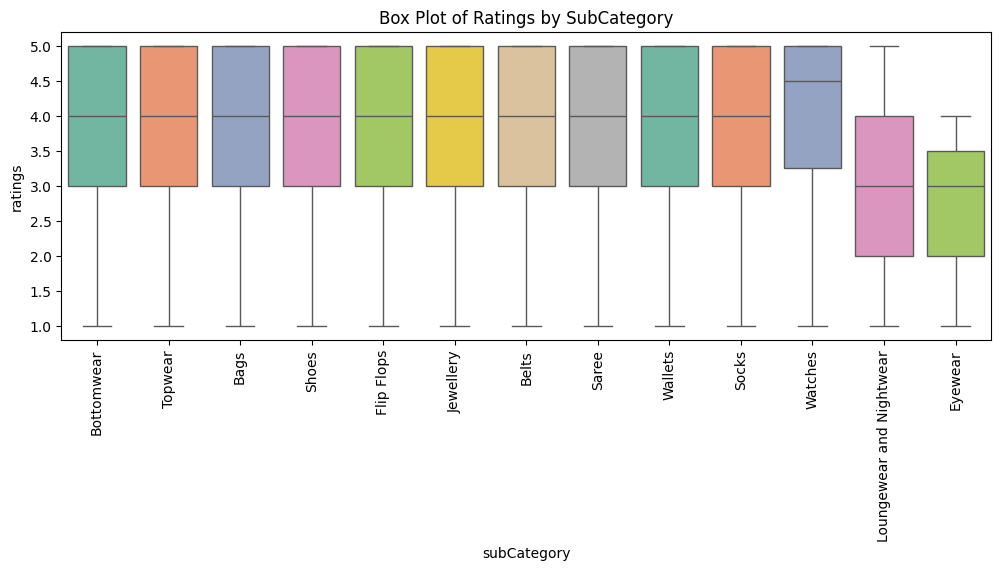

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

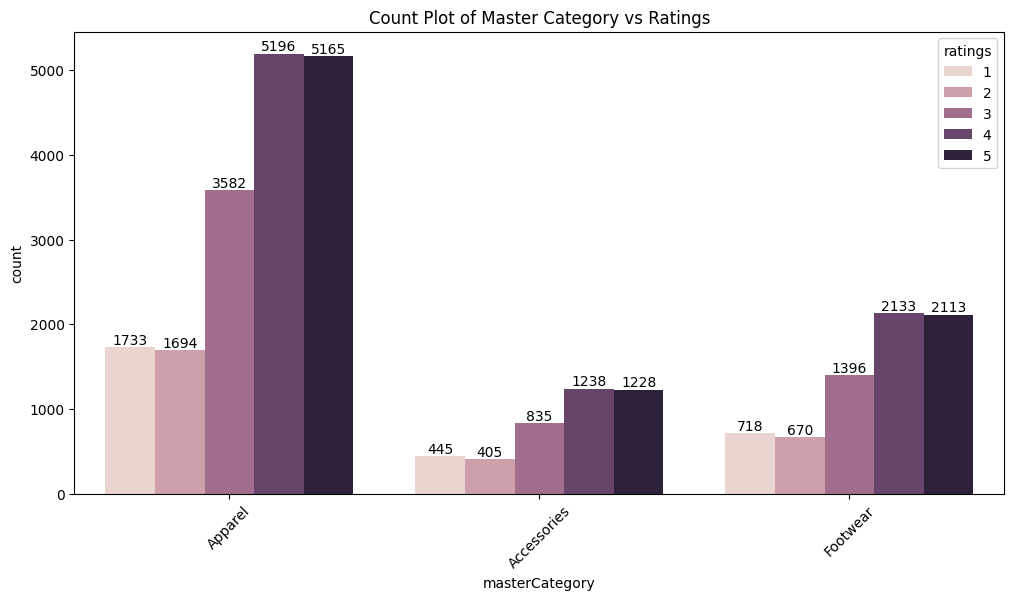

In [ ]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

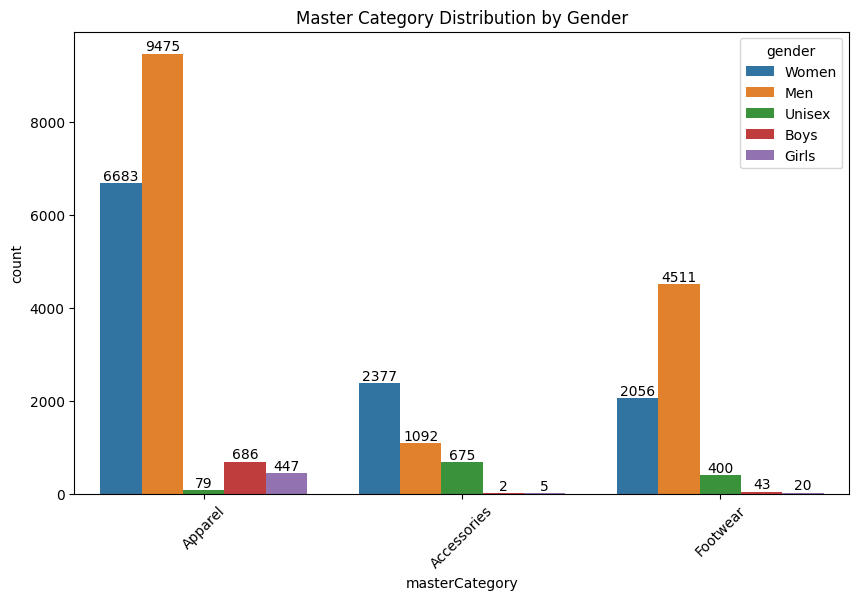

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

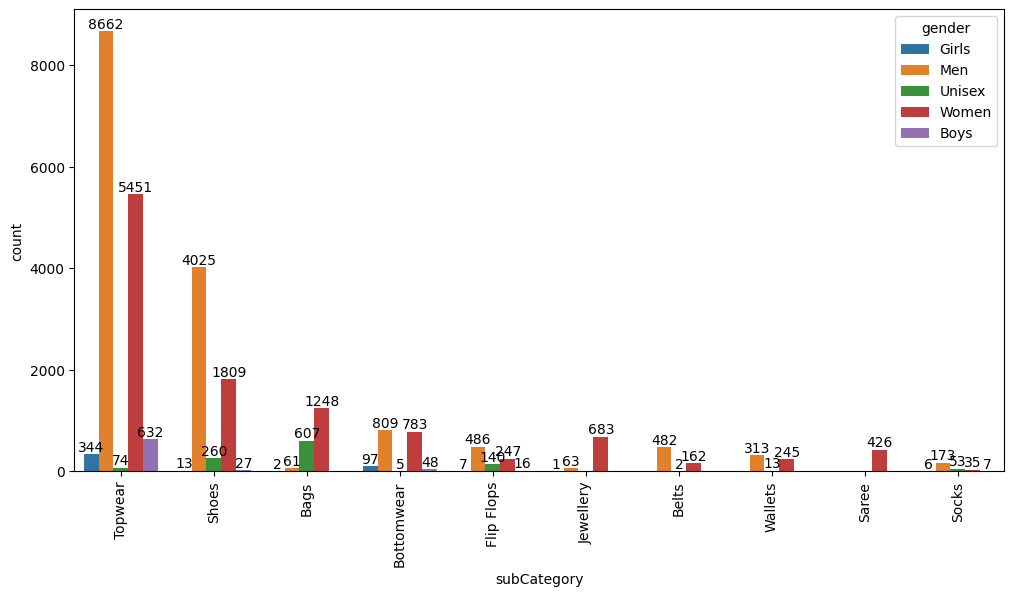

In [ ]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

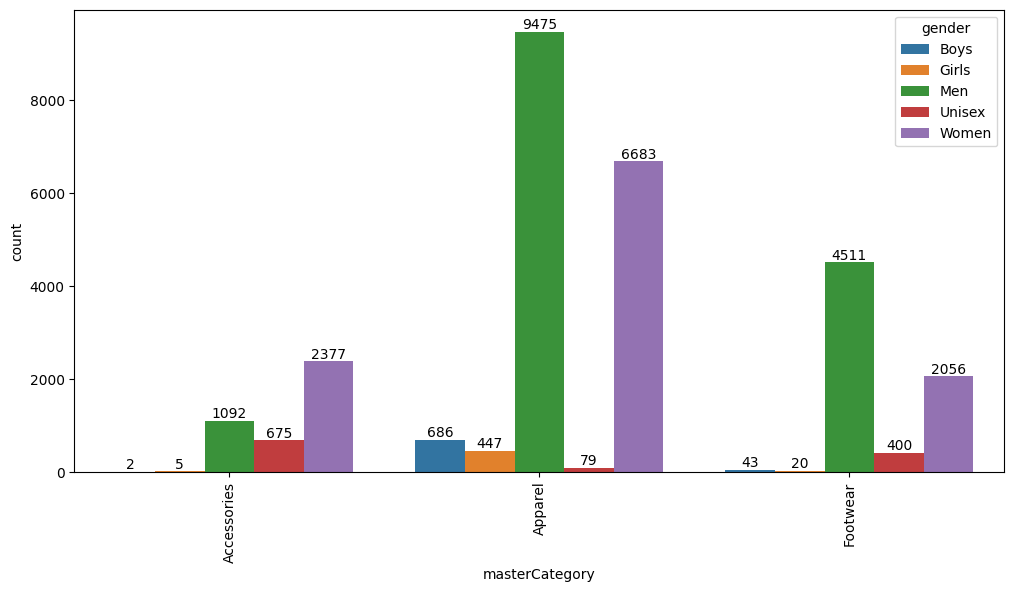

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

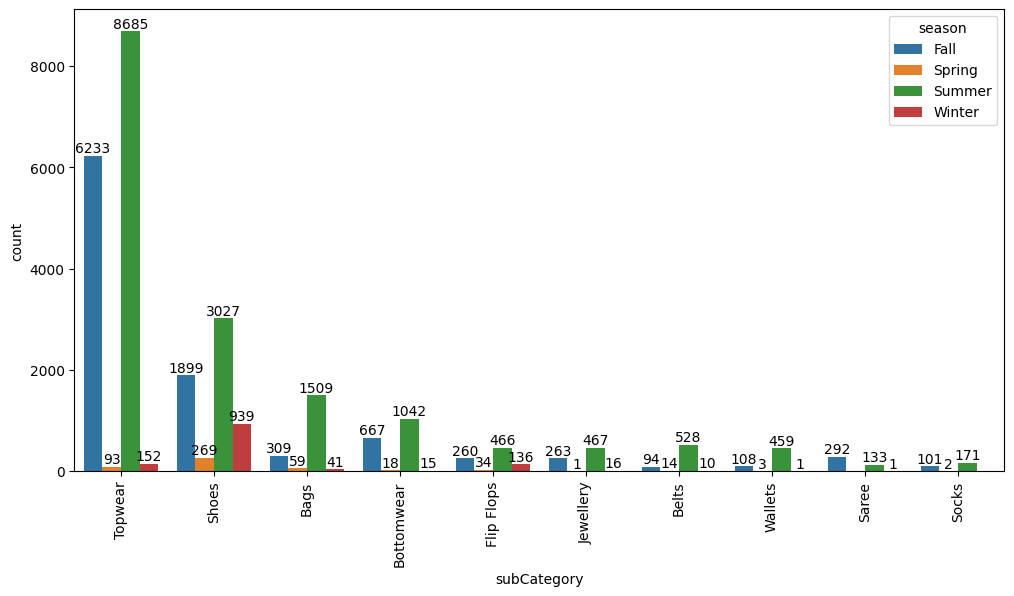

In [ ]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

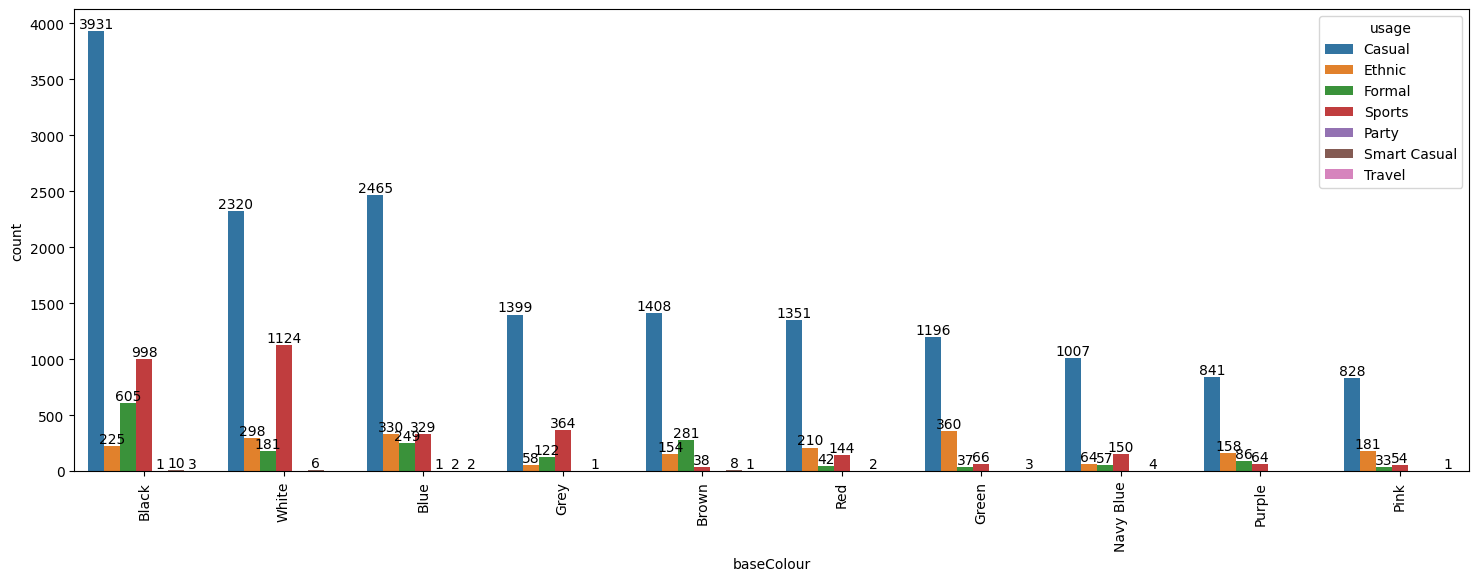

In [ ]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

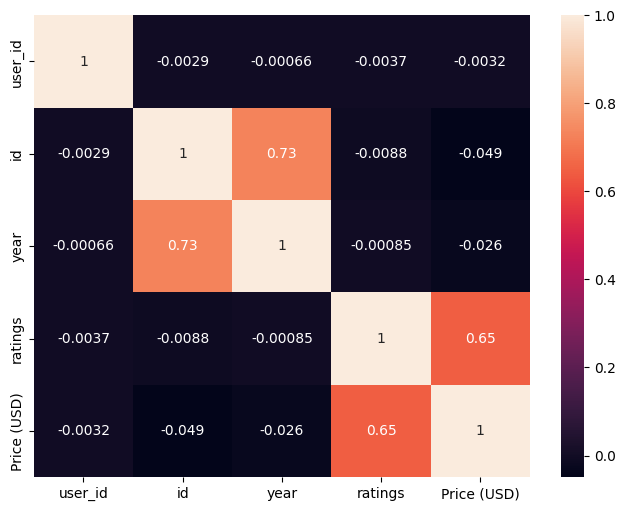

In [ ]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Tren analysis based on Month data</h3>

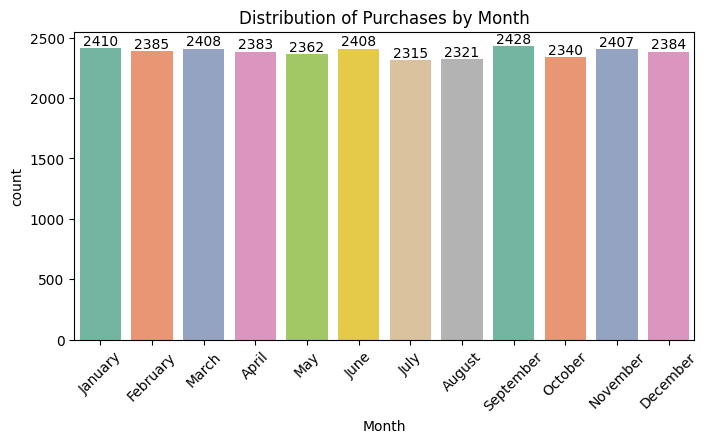

In [ ]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

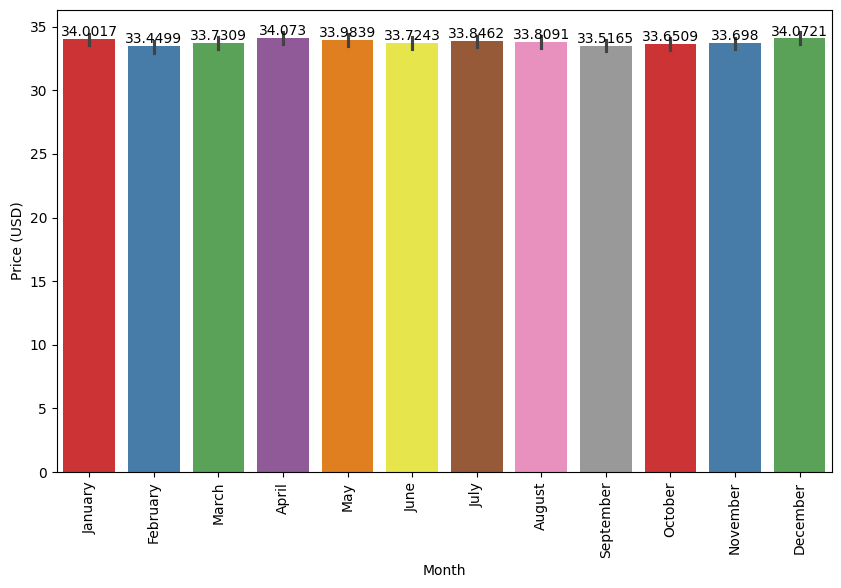

In [ ]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

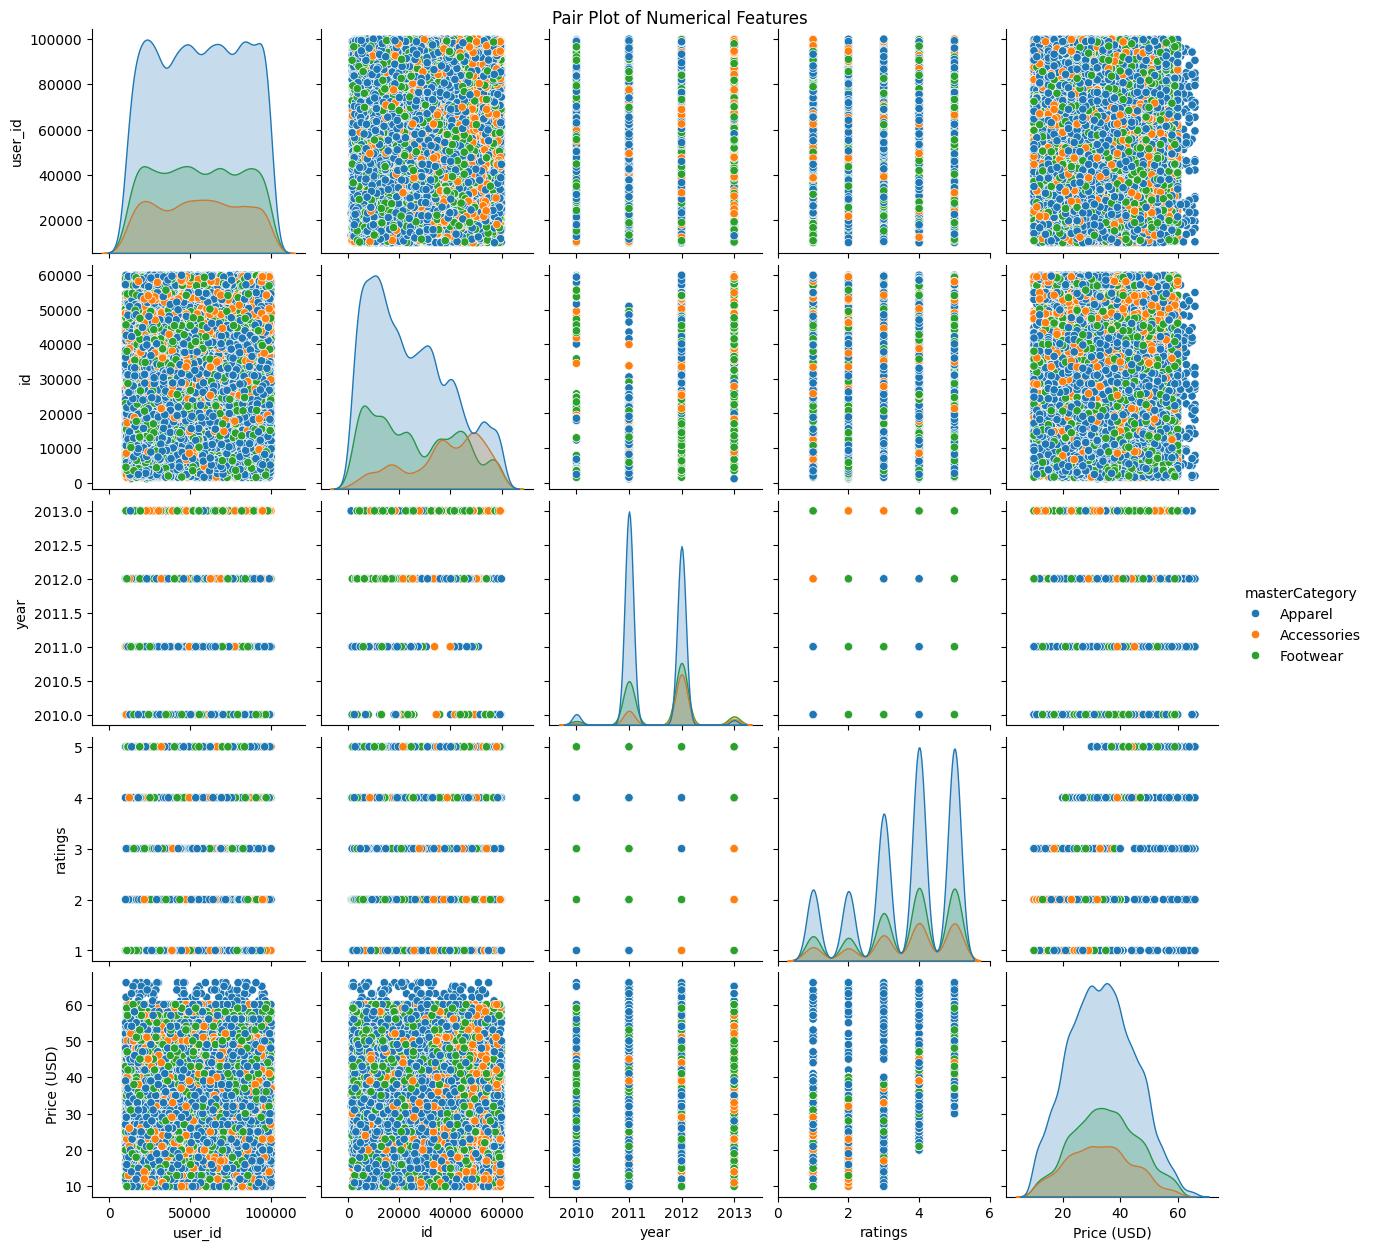

In [ ]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [ ]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [ ]:
df_balanced.year.value_counts()

,count
year,
2011.0,7137
2012.0,7137
2010.0,7137
2013.0,7137


In [ ]:
df_balanced.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
16573,19828,23248,Men,Footwear,Shoes,Formal Shoes,Brown,Fall,2011.0,Formal,Arrow Men Formal Brown Shoe,23248.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied..",February,39
1968,54541,20191,Men,Apparel,Topwear,Tshirts,Grey,Fall,2011.0,Casual,Wrangler Men Grey Polo T-shirt,20191.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for casua...",August,44
12353,72493,13836,Men,Apparel,Bottomwear,Shorts,Navy Blue,Fall,2011.0,Casual,Probase Men Solid Navy Blue Shorts,13836.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again. for specia...",March,56
11940,40735,15577,Boys,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chhota Bheem Kids Boys Warrior Bheem TShirt,15577.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for speci...",October,55
27269,98470,7768,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Sports,Nike Men's As Vapor Ulti Grey Black T-Shirt,7768.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"Fair product, but don't expect much. for every...",November,20


<Axes: xlabel='year', ylabel='Count'>

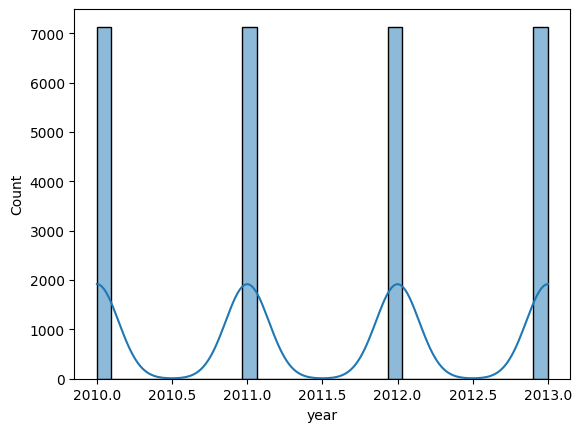

In [ ]:
sns.histplot(df_balanced["year"],kde=True)

# Advanced EDA

<h3>clustering analysis</h3>

In [ ]:
df.shape

(28551, 17)

In [ ]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [ ]:
df_encoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46
1,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29
2,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39
3,46048,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39
4,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41
28547,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53
28548,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43
28549,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48


In [ ]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])

In [ ]:
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [ ]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [ ]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

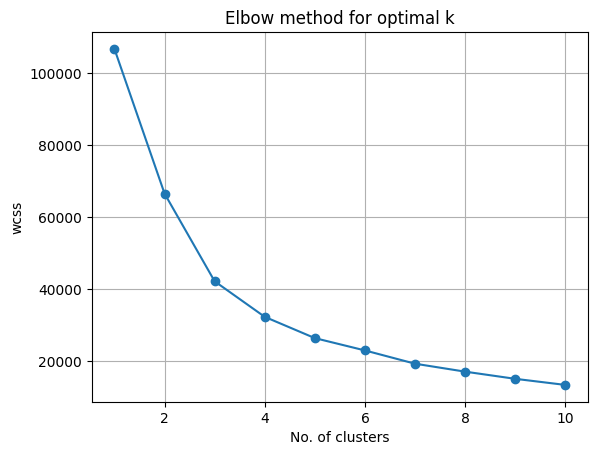

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [ ]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.429872,1.532470
1,-0.436964,-0.014366
2,-2.464212,0.116658
3,0.264773,1.068773
4,-0.197315,-0.542015
...,...,...
28546,0.943306,1.384033
28547,2.547851,1.992272
28548,-1.120116,1.742129
28549,-1.313849,1.894369


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,-0.429872,1.532470,1
1,-0.436964,-0.014366,2
2,-2.464212,0.116658,1
3,0.264773,1.068773,3
4,-0.197315,-0.542015,2
...,...,...,...
28546,0.943306,1.384033,3
28547,2.547851,1.992272,3
28548,-1.120116,1.742129,1
28549,-1.313849,1.894369,1


In [ ]:
df_pca.isnull().sum()

,0
pca1,0
pca2,0
cluster,0


In [ ]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [ ]:
df.isnull().sum()

,0
user_id,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0


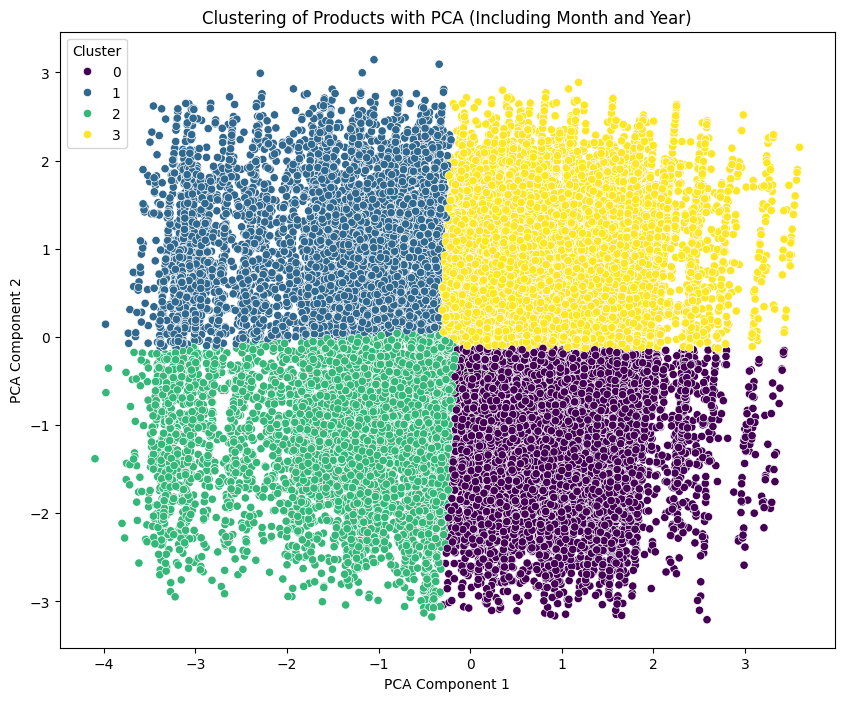

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df.shape

(28551, 18)

***image processing***

In [ ]:
import tensorflow as tf
import os

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Image processing parameters
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [ ]:
image_folder = r'/content/drive/MyDrive/images'

In [ ]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [ ]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: /content/drive/MyDrive/images/8493.jpg
File does not exist: /content/drive/MyDrive/images/39425.jpg
File does not exist: /content/drive/MyDrive/images/12347.jpg


In [ ]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29,2
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39,1
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39,3
4,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24,2
5,23434,17968,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Puma Men Splash Black Slipper,17968.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!!",July,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41,3
28547,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,3
28548,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43,1
28549,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48,1


In [ ]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [ ]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 28548


In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [ ]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [ ]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 893


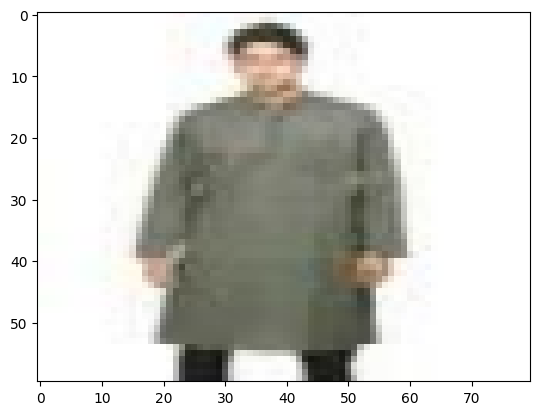

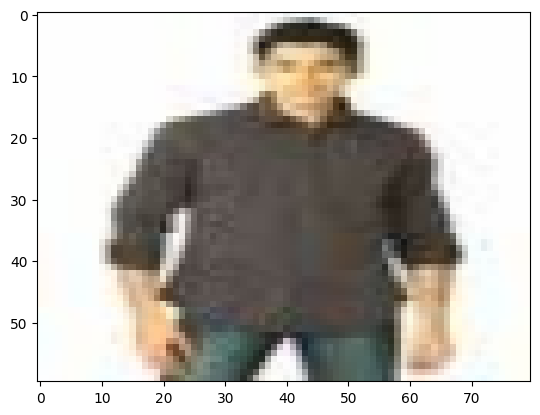

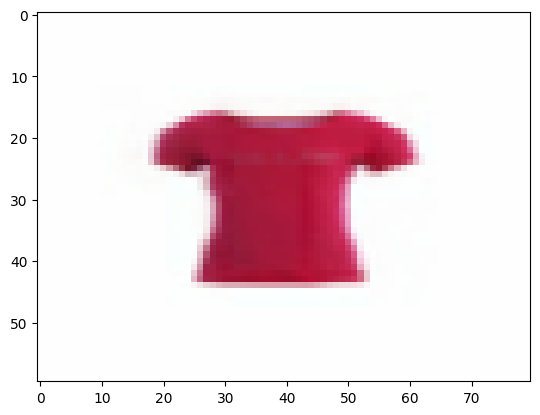

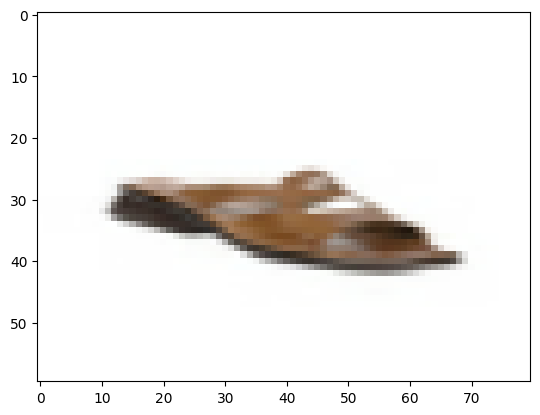

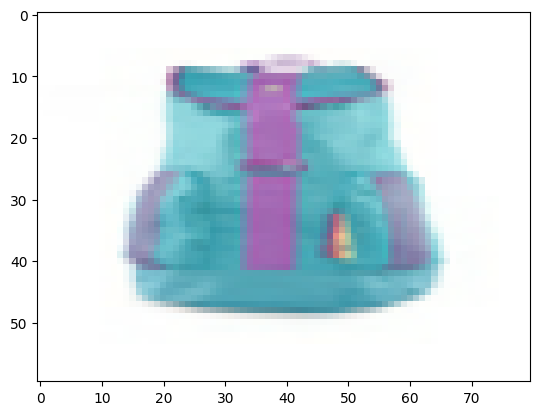

In [ ]:
for images_batch in dataset.take(5):
    plt.imshow(images_batch[0])
    plt.show()

***Content-based filtering***

In [ ]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29,2
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39,1
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39,3
4,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24,2
5,23434,17968,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Puma Men Splash Black Slipper,17968.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!!",July,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41,3
28547,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,3
28548,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43,1
28549,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48,1


In [ ]:
df.columns

Index(['user_id', 'id', 'gender', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'filename', 'link', 'ratings', 'review', 'Month',
       'Price (USD)', 'cluster'],
      dtype='object')

In [ ]:
numnames

['id', 'year', 'ratings', 'Price (USD)']

In [ ]:
df.isnull().sum()

,0
user_id,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0


In [ ]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
       user_id     id  gender  masterCategory  subCategory  articleType  \
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           62   
4        28289  12868       2               2            8           16   
5        23434  17968       2               2            4           15   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
1              13       2  2012.0   

In [ ]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
0,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29,2
1,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39,1
2,46048,48449,2,1,10,62,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39,3
3,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24,2
4,23434,17968,2,2,4,15,1,0,2011.0,0,Puma Men Splash Black Slipper,17968.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!!",5,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28543,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41,3
28544,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53,3
28545,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43,1
28546,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48,1


In [ ]:
df_encoded.isnull().sum()

,0
user_id,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0


In [ ]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,cluster,ratings,Price (USD),year
0,30757,2,1,10,23,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,2,0.315497,-0.423862,0.745031
1,14881,4,0,0,17,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,1,-0.465599,0.459915,-0.890805
2,48449,2,1,10,62,2,2,0,French Connection Men Blue T-shirt,1,3,1.096594,0.459915,0.745031
3,12868,2,2,8,16,1,1,2,Lee Cooper Men Formal Black Shoes,1,2,-0.465599,-0.865751,0.745031
4,17968,2,2,4,15,1,0,0,Puma Men Splash Black Slipper,5,3,0.315497,1.432070,-0.890805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28543,54078,2,2,8,48,29,2,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,11,3,1.096594,0.636671,0.745031
28544,13183,2,2,8,48,42,0,5,Fila Men Dls 96 White Sports Shoes,4,3,1.096594,1.697203,-0.890805
28545,10264,2,2,8,16,1,2,2,Clarks Men Goya Band Leather Black Formal Shoes,9,1,1.096594,0.813426,2.380867
28546,45378,4,2,8,14,1,2,0,Rocia Women Black Sandals,9,1,1.096594,1.255315,0.745031


In [ ]:
# subset_size = 2000
# df_sample = df.sample(n=subset_size, random_state=42)
# df_sample.reset_index(drop=True, inplace=True)
# df_sample

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrices = {}

for cluster_id in range(4):
    cluster_items = processed_dataset[processed_dataset['cluster'] == cluster_id]
    cluster_tfidf = tfidf_matrix[cluster_items.index]

    similarity_matrix = cosine_similarity(cluster_tfidf)
    similarity_matrices[cluster_id] = similarity_matrix

In [ ]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Flip Flops', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Flip Flops', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}
encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

Encoded Complementary Map: {10: [2, 8, 4, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 4, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [ ]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [ ]:
len(processed_dataset[processed_dataset.cluster==2].values)

5648

In [ ]:
def get_recommendations(product_id, df_encoded, similarity_matrices, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the cluster ID for the product
    cluster_id = df_encoded.loc[df_encoded['id'] == product_id, 'cluster'].values[0]
    print(f"Cluster ID: {cluster_id}")

    # Filter the dataframe to only include items from the same cluster
    cluster_df = df_encoded[df_encoded['cluster'] == cluster_id].reset_index(drop=True)
    num_recommendations = len(cluster_df)

    # Get the index of the product in the filtered cluster data
    try:
        product_index = cluster_df[cluster_df['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in cluster {cluster_id}")
        return []

    print(f"Product Index in Cluster: {product_index}")

    # Extract encoded subcategory, gender, and color for the product
    encoded_subcategory = cluster_df.loc[product_index, 'subCategory']
    product_gender = cluster_df.loc[product_index, 'gender']
    encoded_colour = cluster_df.loc[product_index, 'baseColour']
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour {encoded_colour}")

    # Get similarity scores for products within the cluster
    similarity_scores = similarity_matrices[cluster_id][product_index]
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]

    # Initialize recommendations dictionary to collect one item per complementary subcategory
    recommendations = {}
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])

    for index in similar_indices:
        recommended_product = cluster_df.iloc[index]
        recommended_subcategory = recommended_product['subCategory']
        recommended_colour = recommended_product['baseColour']

        # Check if the recommended product matches the complementary subcategory, gender, and color contrast
        if (recommended_subcategory in complementary_subcategories and
            recommended_product['gender'] == product_gender and
            recommended_colour in complementary_colours):

            # Only add if a product from this subcategory hasn't already been added
            if recommended_subcategory not in recommendations:
                recommendations[recommended_subcategory] = recommended_product['id']

            # Stop if we have a product from each complementary subcategory
            if len(recommendations) == len(complementary_subcategories):
                break

    # Check if we have at least one item from each complementary subcategory
    if len(recommendations) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found in the cluster.")

    return list(recommendations.values())


In [ ]:
processed_dataset.id.sample(5)

,id
3947,13522
6277,58271
22689,45859
1888,43061
14210,13533


In [ ]:
product_id= 37785
recommended_products = get_recommendations(product_id,processed_dataset,similarity_matrices,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Cluster ID: 2
Product Index in Cluster: 493
Encoded Subcategory: 10, Gender: 2, Colour 2
Some complementary subcategories could not be found in the cluster.
Recommended products: [39642, 21181, 8921, 6982]


In [ ]:
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_products:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['//content//drive//MyDrive//images//39642.jpg',
 '//content//drive//MyDrive//images//21181.jpg',
 '//content//drive//MyDrive//images//8921.jpg',
 '//content//drive//MyDrive//images//6982.jpg']

In [ ]:
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

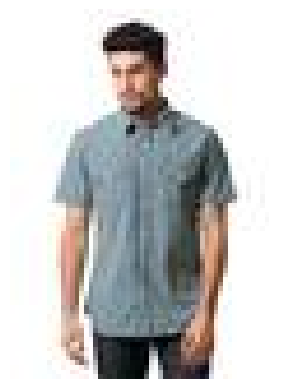

In [ ]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [ ]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

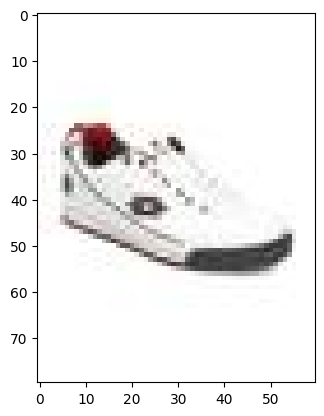

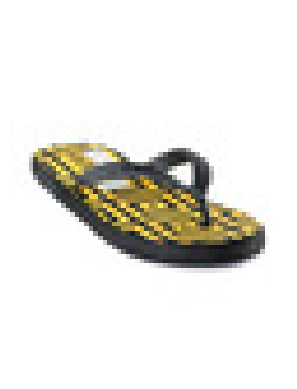

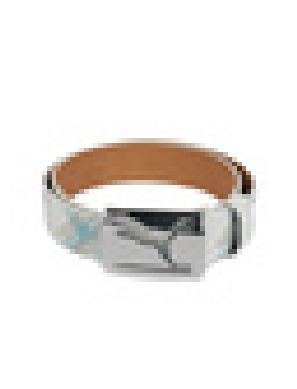

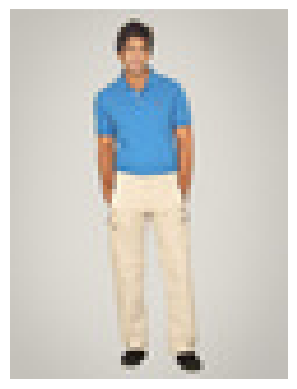

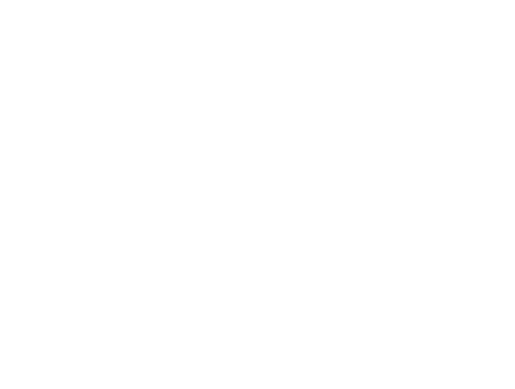

In [ ]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")